# E-Class Assessment for Introductory Physics Classes at MSU

<img src="exp1.jpg" style="width:800px;height:500px" />

The E-class assessment is the Colorado Learning Attitudes about Science Survey for Experimental Physics, This survey is geared towards learning more about how students think about experimental physics. For this project we will be looking at data collected from two algebra-based physics courses at Michigan State University during the period of fall 2015 - spring 2019.

The classes here analyzed are:
- PHY 251 : Intro Physics Lab I
- PHY 252 : Intro Physics Lab II

The E-CLASS is a research-based and validated survey that probes students’ views about the nature and importance of experimental physics a little more about the assessment:

After its initial development, the E-CLASS was reviewed by 23 practicing experimental physicists. These expert responses both ensured that the E-CLASS prompts were clear and valuable and established the consensus expertlike responses to each item. Twenty-four of the E-CLASS items had greater than 90% agreementfromourpoolofexperts.The remaining six questions all had greater than 70% agreement. The E-CLASS was also given to 42 students in an interview setting, in which students responded to each prompt while talking through the reasoning behind their selection. These student interviews ensured that students were consistently interpreting the prompts and responding in ways that were consistent with their articulated reasoning. (wilcox et al.)

For the purposes of this experiment i will be looking into several aspects of the classroom structure. Gender and race representation as well as perfomativity are some of the this things I will focus on.

### Here are some of the libraries we will need

In [1]:
from routines import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

### Let's get started by importing our dataset

In [2]:
#Loading All Data
All_data=pd.read_csv("msu-eclass-hashed-coded-edited.csv")
print("Our dataset has {} entries".format(len(All_data)))

Our dataset has 3023 entries


As mentioned above we want to focus on the entries wherein students have revealed their gender. Additionaly, responses from students who have only answered the pre or post survey survey were discarded. Furthermore, one interesting aspect of this data is that the response for the race identification question did not have any entries at the earlier stages of this data collection, the earliest response encoutered was from fall 2016 a year later from when the data collection started. I belive this points to a change in strategy most likely the race and gender fields on the survey were optional at the beginning and became a required field as Geraldine L. Cochran points out on his paper on "Identifying barriers to ethnic/racial minority students’ participation in graduate physics". I believe the same happened to the proces of data collection here at MSU. 

In [3]:
#Masking only data that has gender input

G_mask=All_data[All_data['Gender'].str.contains("F") | All_data['Gender'].str.contains('M') | All_data['Gender'].str.contains('Other')] 
print("Our gender-based dataset has {} entries".format(len(G_mask)))

Our gender-based dataset has 3006 entries


### A deeper look at the data

#### Demographics Of Sample Population

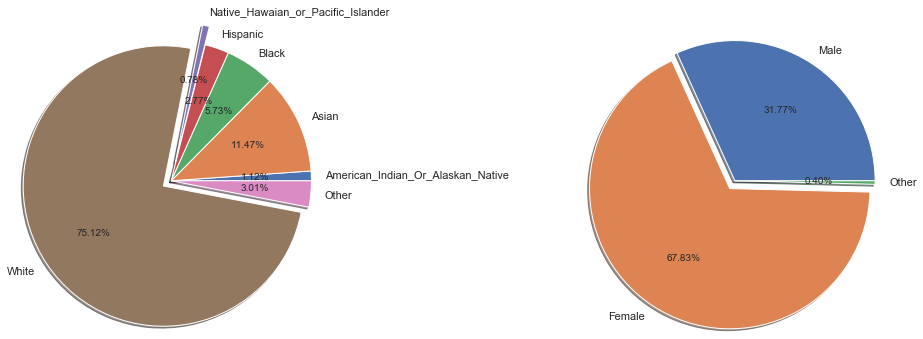

In [4]:
Demographic_plotter(G_mask)

#### Overall Performance

Bellow are plotted the performance graph for pre and post survey results given by the different identified genders, the x-axis represents the number of points acchieved the y-axis the number of student who have achied the grade. The first row of graphs displays the pre-test results while the bottom row graphs display the post test results.

Note: this plotting structure will repeat throughout the notebook.

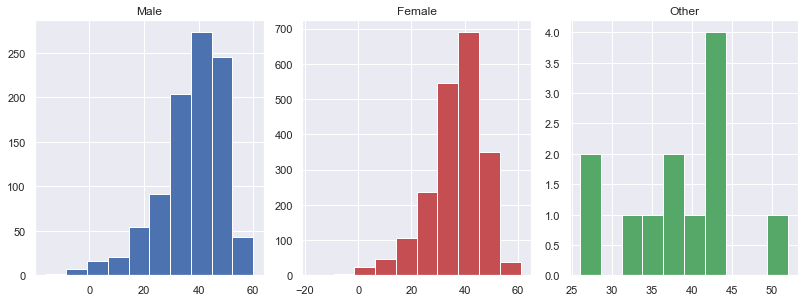

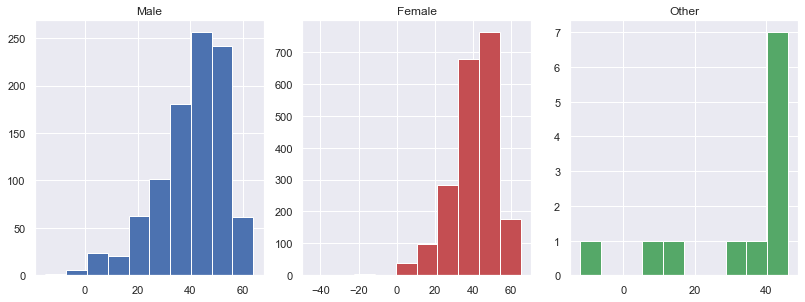

In [5]:
Perfomance_plotter(G_mask, "Pre")
Perfomance_plotter(G_mask, "Post")

At first look we can see that majory of the students enrroled in these courses are predominantly "white female". However, talking about the classes with some other students and previous ULA's it became clear that the data matches expectations as people who usually take these classes are for the most part people in Human Biology, Pre-Med, Pre-Vet courses at MSU, we will look at that later in this project.

Note: that the currently displayed data comprises of both PHY 251 and PHY252

Our dataset contains contains both traditional and transformed courses. Numerous studies suggests that students in transformed courses tend to do better than those in traditional course. We're gonna put this theory to test by looking at the performance for the two different course structure. 

In [6]:
#Splitting the Data into Traditional and Transformed
G_transformed=G_mask[G_mask["IsTransformed.y"]==1]
G_traditional=G_mask[G_mask["IsTransformed.y"]==0]

#### Traditional Lab Curricula

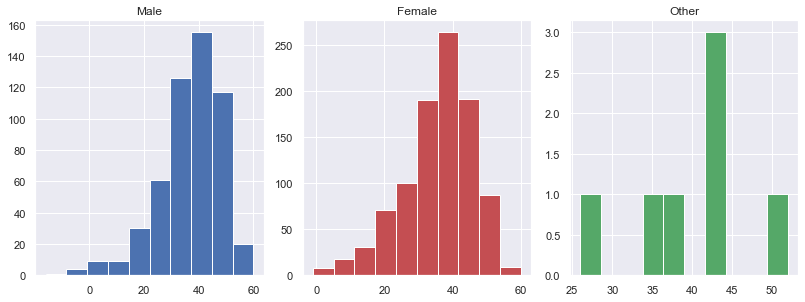

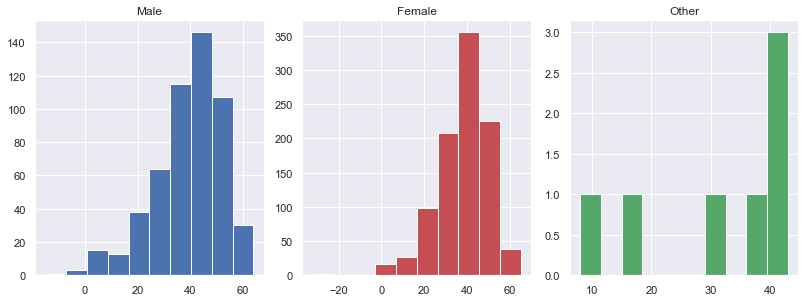

In [7]:
Perfomance_plotter(G_traditional, "Pre")
Perfomance_plotter(G_traditional, "Post")

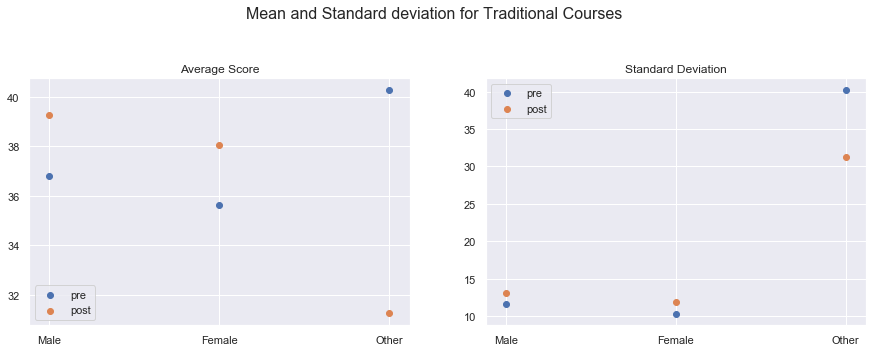

In [17]:
Test=Stat_Analysis(G_traditional,0)

#### Transformed Lab Curricula

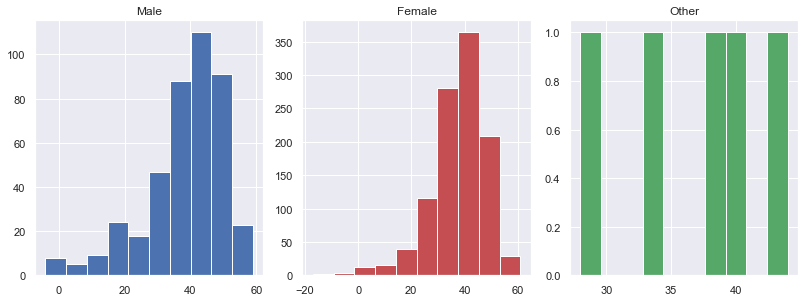

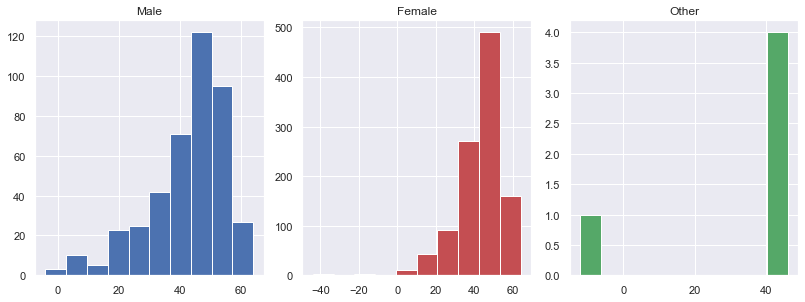

In [18]:
Perfomance_plotter(G_transformed, "Pre")
Perfomance_plotter(G_transformed, "Post")

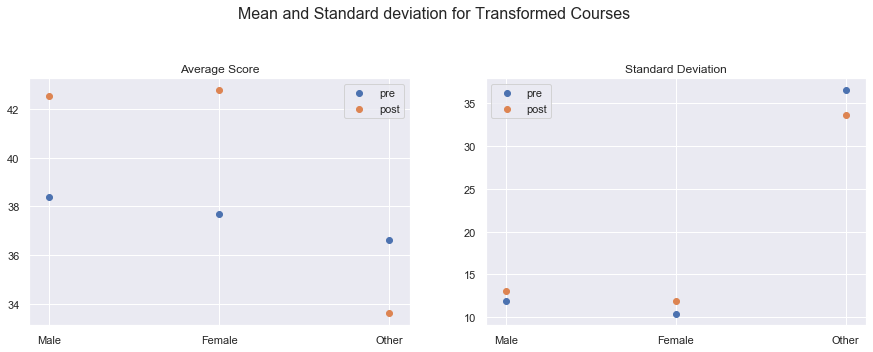

In [19]:
Test1=Stat_Analysis(G_transformed,1)

At this point we can see a patern emerging, a patern discussed in various readings during class. there are two claims the last three sets of graphs can help to validate. 

Adrienne L. Traxler et al - Enriching gender in physics education research: A binary past and a complex future:
    - "A group at Harvard University reported eliminating the gender gap on the FCI by using Peer Instruction, the University of Washington Tutorials, and cooperative group problem solving. They emphasized that closing the gap was due to women improving their performancewhile men continued to perform at high levels. However, this result could not be replicated at the University of Colorado." 
   
We can see through the set of graphs that male students tend to perform at about the same level in both pre and post test whether its a traditional or a transformed lab. However, women performance tends to have a significantly higher increase in their performance for post tests and that is even more acentuated in the transformed courses which has been also discussed by Wilcox et al.

Wilcox et al. - Students’ views about the nature of experimental physics:
    - "Significant improvement in E-CLASS scores was also documented in courses that use well-established transformed curricula compared to traditional labs at the introductory level, and the increase was significantly larger for women. Additional investigations showed that courses that focus more on developing lab skills out perform courses that focus more on reinforcing physics concepts within the lab component, and again, the increasewas significantly larger for women"

### Looking at overall gain 

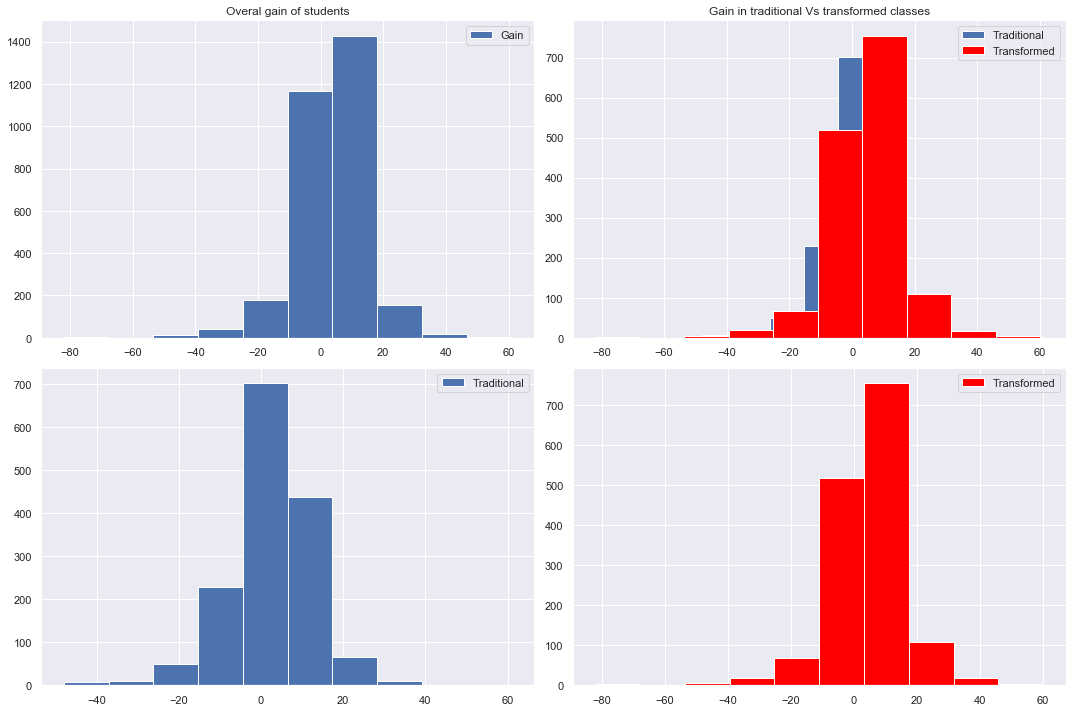

In [11]:
G_mask_scores=Scores(G_mask)
trad_scores=Scores(G_traditional)
trans_scores=Scores(G_transformed)


trad_gains=Gain(trad_scores[0],trad_scores[1])
trans_gains=Gain(trans_scores[0],trans_scores[1])
#================Plots====================

axes=plt.figure(figsize=(15,10))

#Overall
ax1=axes.add_subplot(221)
ax1.hist(Gain(G_mask_scores[0],G_mask_scores[1]), label='Gain')
ax1.set_title("Overal gain of students")
ax1.legend()

#Traditional Vs transformed
ax2=axes.add_subplot(222)
ax2.hist(trad_gains, label='Traditional')
ax2.hist(trans_gains, color='red', label='Transformed')
ax2.set_title("Gain in traditional Vs transformed classes")
ax2.legend()

ax3=axes.add_subplot(223)
ax3.hist(trad_gains, label='Traditional')
ax3.legend()

ax4=axes.add_subplot(224)
ax4.hist(trans_gains, color='red', label='Transformed')
ax4.legend()

plt.tight_layout()
plt.show()

Above we explored the overall and individual  gain in our data set, gain here is being defined as the diference between the post and pre survey, negative gain indicates that students answers/thoughts/atitudes towards experimental physics are less expertlike. The graph on the top left show us a trend that has been well documented on studies done on E-CLASS Assesments previously. The trend being that transformed and well implemented lab curricula have a significantly higer scoring than traditional labs. (wilcox et al.)

Another thing to keep in mind is the size of each subset (traditional and transformed), we can see bellow that there is about the same number of students on each subset.

### Futher Look at Statistics

To validate the claims above, we're gonna look at some subsets of our population, this time we selected two fall courses with approximately the same number of students per subset. one subset contains traditional data only and the other transformed only. 

   - #### Data:
        - Fall Semester 2016 (traditional, 445)
        - Fall Semester 2018 (transformed, 485)
        
Null Hypothesis (H0): Students on a traditional lab curricula perform just as good as students on a transformed Lab curricula;

Aternative Hypothesis (HA): Students on a transformed lab perform  better than those on traditional labs, specially female students

using a Z-test we're gonna check if we can reject the Null Hypothesis, with a 95% confidence level ==> significance level ($\alpha$) = 0.05

There are 445 data points for FS16-251
The average gain is 1.31
The standard deviation in gain is 11.3


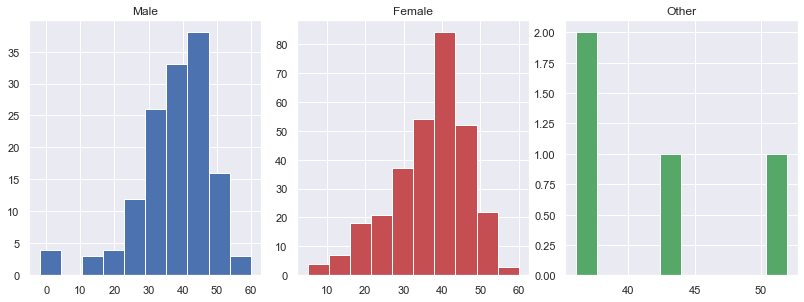

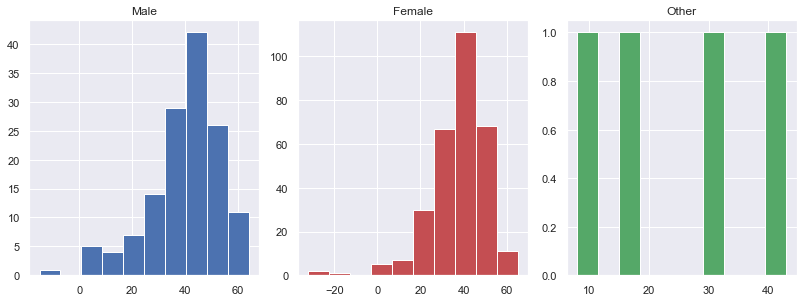

In [12]:
FS16=G_mask[G_mask["CourseID"]=="phys251-fa16"]
print("There are {} data points for FS16-251".format(len(FS16)))
FS16_scores=Scores(FS16)
FS16_gains=Gain(FS16_scores[0],FS16_scores[1])
FS16_mean=FS16_gains.mean()
FS16_std=FS16_gains.std()
print("The average gain is {}".format(round(FS16_mean,2)))
print("The standard deviation in gain is {}".format(round(FS16_std,2)))

Perfomance_plotter(FS16,"Pre")
Perfomance_plotter(FS16,"Post")

There are 485 data points for FS18-251
The average gain is 4.35
The standard deviation in gain is 12.93


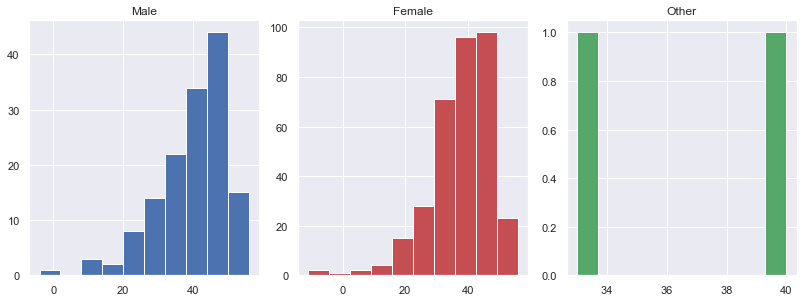

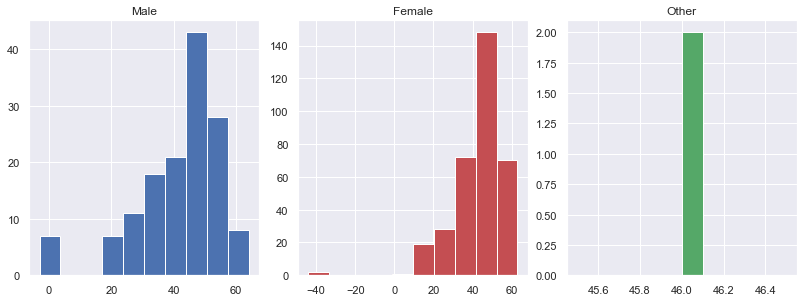

In [13]:
FS18=G_mask[G_mask["CourseID"]=="phys251-fa18"]
print("There are {} data points for FS18-251".format(len(FS18)))
FS18_scores=Scores(FS18)
FS18_gains=Gain(FS18_scores[0],FS18_scores[1])
FS18_mean=FS18_gains.mean()
FS18_std=FS18_gains.std()
print("The average gain is {}".format(round(FS18_mean,2)))
print("The standard deviation in gain is {}".format(round(FS18_std,2)))

Perfomance_plotter(FS18,"Pre")
Perfomance_plotter(FS18,"Post")

        For the purposes of our analysis we are gonna use a two-sample Z_score formula:

$$Z=\frac{mean_s-mean_n}{\sqrt{\frac{std_s^2}{N_s}+\frac{std_s^2}{N_n}}} $$

where $mean_s$ is the sample mean, $mean_n$ is null or sample2 mean, $std_s$ is the standard deviation of sample mean, 
$std_n$ is the standard deviation of null or sample2 mean, $N_s$ is the number of sample1, and $N_2$ is the number of sample2

In [14]:
Z_val=Z_test(FS18_mean,FS16_mean,FS18_std, FS16_std, len(FS18), len(FS16))
print("Z = ",round(Z_val,2))

Z =  3.81


Looking up correspondind area for the given Z value on the table bellow we get A=0.99993, therefore we get:

In [15]:
p_value=round(1-0.999,3)
print("p_value= ",p_value)

p_value=  0.001


<img src="positiveztable.png" />

Our p_value is lower than our significance level which implies that we can reject the Null Hypothesis. However, P_values only tell us that there's sufficient evidence to reject the null hypotesis doens't tell us about the magnitude of change as a result of a change in curricula. Therefor, we are gonna look next at effect size.

Similar to our Z_score formula we are using the Cohen's de formula that includes 2 different sample groups:


$$Cohen' ds= \frac{{mean_s-mean_n}}{\sqrt{\frac{(N_s-1)std_s^2+(N_n-1)std_n^2}{N_s+N_n-2}}}$$

In [16]:
eff_size=round(effect_size(FS18_mean,FS16_mean,FS18_std,FS16_std, len(FS16),len(FS18)),2)
eff_size

0.25

<img src="cohend.png" />

According to Cohen's guideliness on the interpretation of the value obtained, we can claim that having a well designed and implemented transformed lab has a significant impact on students E-class assessment scores and gain.

### Summary

On this project we analysed some data collected at MSU as part of the E-Class Assessment, The test tries to  learning more about how students think about experimental physics. the test is given to student at the beginning of the semester and at the end of the semester. we looked at the overall scoring for both tranformed and taditional lab curricula, we look at how male students score compared to female students, where we see that male students tend to keep perform or make smaller improvements while females tend to perform lower on the pre test and perform significantly better on post exams. This patern repeats itself and is more significant on transformed lab courses, hence closing the gender gap observed on pre test. To further emphasize our claims we performed a Z-test and found that there is enough evidence point to there be a significant increase in students gain with the implementation of the transformed lab curricula as the main reason for this outcome. 

There were a few areas of concern which are gonna be discussed on the section bellow, but one aspect of the project I had a few concerns while doing the analysis was that our scoring data does not fully resemble a a normal distribuition and that could affect our Z_value and consequently our p_value. However, to minimize these possible systematic errors I've tried to find subdata-sets whith approximately the same number of students and semi-normal distribuition for the statistical analysis (FS16 and FS18)

Lastly, this project could benefit of a bit more of structure and analysis given more data and time. Even though, I believe I have been able to get sufficient evidence to support my claims which pertain to gender-gap and performativity. Another thing that would be interesting to look it is the intersection of race, performance and gender, but that's a fight for another day...

### Limitations & Future Work

There were a variety of limitations elaboration of this project/report, one of the things being related to the fact that the participants IDs are  hashed and therefore there is no way to tell whether a student has re-taken a course or even taken both courses which would in turn allow us to a further explore whether the individual understanding about the nature and importance of experimental physics has changed as a result of being more familiar with the lab/classroom structure. " With respect to the impact of laboratory instruction, participation in an upper level lab courses did not tend to result in significant shifts in students’ views over the course of a single semester" (Wilcox et al.).

Moreover, the lack of information on some questions on the post survey present a challenge to further my investigation. for instance the data set contains data about students current major, whether they plan to change their major, what's their current interest in physics and also their semester interest in physics, however the codebook provided does not account to what the values presented represent. I believe given the respective codes, we would have a little more to cross check the claims and give us a better understanding as to why students think/feel the way they feel about experimental physics.

Lastly, I Would love to go over the qualitative data present in the data set as it would clear most of the uncertainties, quantitative data is good predictor, however I feel that if we're really trying to see what students feel or think about experimental physics through labs, the best way to acomplish that is by listening to their words, whether witten or oral, instead of confining it to a buble they have to fill. As we know well, a lot of times people do not identify to a single bubble, more over the way the data was processed it reduced a 5 scale  to 3 scale for easier handling and analysis. While I'd like to look closer at the qualitative data I do not have the time nor resources to do it at the time as our data set contains over 3000+ useful data points (with a possibility of lesser data points for qualitative data due to the question being open ended and optional on the survey.

### References

[1] Adrienne L. Traxler et al - Enriching gender in physics education research: A binary past and a complex future

[2] Wilcox et al. - Students’ views about the nature of experimental physics

[3] Wilson et al. - "Differences in gender performance on competitive physics selection tests"

[4] https://www.ztable.net